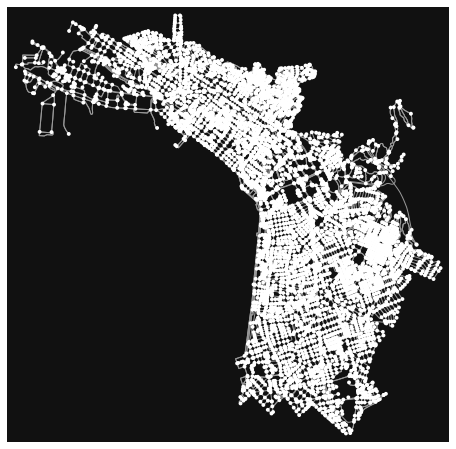

<Figure size 432x288 with 0 Axes>

In [16]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona.crs
import numpy as np
import pandas as pd

place_name = "Δήμος Θεσσαλονίκης"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [29]:
leisure = ox.geometries.geometries_from_place(place_name,  tags = {"leisure":True})
leisure = leisure[['leisure','name', 'geometry']]
leisure = leisure[leisure['geometry'].type == 'Polygon']
historic = ox.geometries.geometries_from_place(place_name,  tags = {"historic":True})
historic = historic[['historic','name', 'geometry']]

In [68]:
crs = fiona.crs.from_epsg(2100)
geo_parks = gpd.GeoDataFrame(leisure, geometry = 'geometry', crs=crs)
geo_hist = gpd.GeoDataFrame(historic, geometry = 'geometry', crs=crs)

geo_parks2 = geo_parks[geo_parks['leisure'].str.contains('park|garden|playground|dog_park|recreation_ground', na=False)]
geo_hist2 = geo_hist[geo_hist['geometry'].type == 'Polygon']

In [70]:
import folium

m = folium.Map([40.6347, 22.9362], zoom_start=12, tiles='openstreetmap')
# Add custom basemaps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}
basemaps['Google Satellite Hybrid'].add_to(m)
folium.GeoJson(geo_parks2['geometry'], style_function=lambda feature, color='green': {
                    'fillColor': color,
                    'color':"green",
                    'weight': 0.5,
                    'dashArray': '6,6',
                    'fillOpacity': 0.8,
                }).add_to(m)
folium.GeoJson(geo_hist2['geometry'], style_function=lambda feature, color='brown': {
                    'fillColor': color,
                    'color':"darkyellow",
                    'weight': 0.5,
                    'dashArray': '6,6',
                    'fillOpacity': 0.8,
                }).add_to(m)
folium.LatLngPopup().add_to(m)
m